In [3]:
import torchvision
import torch
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

In [4]:
repo_ = "pytorch/vision:v0.13.1"
m_list = torch.hub.list(repo_)
success_list = set()
model_data = dict()
m_list

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fcn_resnet101',
 'fcn_resnet50',
 'get_weight',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'raft_large',
 'raft_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 '

In [2]:
from PIL import Image
from torchvision.io import read_image
def load_image(path, show=False):
    img = read_image(path)
#     with open(path, "rb") as fp:
#         img = Image.open(fp)
#         return img
    if img is None:
        return None
    if show:
        plt.imshow(transforms.ToPILImage()(img))
        plt.axis('off')
    return img

tensor([[[ 73,  59,  64,  ...,  86,  83,  79],
         [ 74,  71,  71,  ...,  83,  89,  92],
         [ 75,  61,  57,  ...,  81,  88,  92],
         ...,
         [ 51,  49,  58,  ..., 217, 218, 211],
         [ 48,  54,  63,  ..., 221, 211, 191],
         [ 45,  55,  58,  ..., 160, 163, 179]],

        [[ 92,  94,  92,  ..., 108, 110, 113],
         [ 94,  98,  98,  ..., 111, 108, 107],
         [ 97,  94,  98,  ..., 112, 108, 105],
         ...,
         [ 82,  77,  75,  ..., 191, 219, 205],
         [ 79,  76,  79,  ..., 226, 219, 214],
         [ 74,  72,  72,  ..., 180, 180, 184]],

        [[125, 136, 139,  ..., 157, 153, 151],
         [131, 128, 127,  ..., 150, 150, 148],
         [121, 129, 128,  ..., 158, 158, 157],
         ...,
         [ 87,  78,  82,  ..., 200, 214, 205],
         [ 64,  63,  66,  ..., 229, 222, 204],
         [ 54,  53,  55,  ..., 189, 196, 190]]], dtype=torch.uint8)

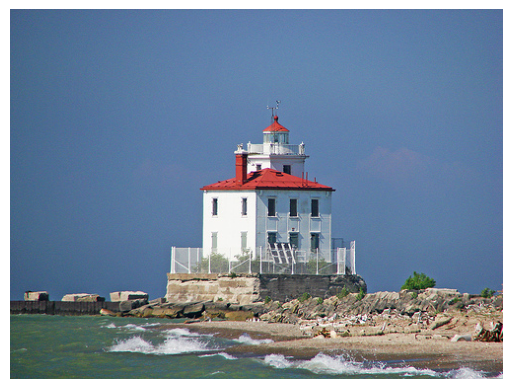

In [3]:
img_path = "/home/amin/repos/ma-praxis-related/imagenet-sample-images/n02894605_breakwater.JPEG"
load_image(img_path, show=True)

In [4]:
def ToRGB(x):
    if x.shape[0]==1:
        return  x.repeat(3, 1, 1)
    return x

In [5]:
t = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    ToRGB
    ])

In [6]:
from torchvision.models import ConvNeXt_Tiny_Weights
t = transforms.Compose([
    ToRGB,
    transforms.ToPILImage(),
    ConvNeXt_Tiny_Weights.IMAGENET1K_V1.transforms()
])

In [7]:
from pathlib import Path
img_dataset = "/home/amin/repos/ma-praxis-related/imagenet-sample-images/"
pathlist = Path(img_dataset).glob('*.JPEG')
images = []
labels = []
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    img = load_image(path_in_str)
    img = t(img)
    img = img.unsqueeze(0)
    images.append(img)
    labels.append(path.stem)
images_t = torch.cat(images)

In [11]:
len(images)

1000

In [12]:
labels

['n02106382_Bouvier_des_Flandres',
 'n04254777_sock',
 'n04613696_yurt',
 'n02256656_cicada',
 'n02106550_Rottweiler',
 'n04204238_shopping_basket',
 'n04264628_space_bar',
 'n04557648_water_bottle',
 'n03271574_electric_fan',
 'n02837789_bikini',
 'n04599235_wool',
 'n07613480_trifle',
 'n02447366_badger',
 'n02099429_curly-coated_retriever',
 'n01945685_slug',
 'n03595614_jersey',
 'n01629819_European_fire_salamander',
 'n04592741_wing',
 'n04251144_snorkel',
 'n04141975_scale',
 'n02802426_basketball',
 'n03297495_espresso_maker',
 'n02096437_Dandie_Dinmont',
 'n04277352_spindle',
 'n06874185_traffic_light',
 'n02096585_Boston_bull',
 'n01695060_Komodo_dragon',
 'n03843555_oil_filter',
 'n03759954_microphone',
 'n04532670_viaduct',
 'n01443537_goldfish',
 'n04263257_soup_bowl',
 'n04044716_radio_telescope',
 'n01491361_tiger_shark',
 'n03804744_nail',
 'n04515003_upright',
 'n02835271_bicycle-built-for-two',
 'n02104029_kuvasz',
 'n07697537_hotdog',
 'n02092339_Weimaraner',
 'n01751

In [13]:
images_t.shape

torch.Size([1000, 3, 224, 224])

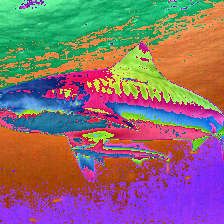

In [14]:
transforms.ToPILImage()(images[33].squeeze(0))

In [36]:
# m = torch.hub.load(repo_, "convnext_tiny")
model = torchvision.models.convnext_tiny(weights="DEFAULT")
# model = torch.hub.load(repo_, "resnet50", weights="IMAGENET1K_V2")

Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /home/amin/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
21.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

73.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate=none)
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96

In [41]:
images_t[0].unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [43]:
pred = m(images_t[0].unsqueeze(0))

In [47]:
pred.squeeze(0).softmax(0).argmax().item()

377

In [49]:
labels[0]

'n02106382_Bouvier_des_Flandres'

In [50]:
import crypten

In [52]:
enc_model = crypten.nn.from_pytorch(model, images_t[0].unsqueeze(0))

/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py:164: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  param = torch.from_numpy(numpy_helper.to_array(node))


In [53]:
enc_model

Graph unencrypted module

In [54]:
from benchmarks.models import Model

/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/amin/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
52.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate

FileNotFoundError: [Errno 2] No such file or directory: '/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/benchmarks/dog.jpg'

In [32]:
import re
import inspect

pattern = re.compile(r"autoclass:: ([\w\.]+)\n")

def get_weights_class_name(model_name="alexnet"):
    try:
        f = getattr(torchvision.models, model_name)
    except AttributeError:
        return None
    d = f.__doc__
    match = pattern.search(d)
    if match is not None:
        return eval(match.group(1) + ".DEFAULT")
    return None

In [33]:
from pathlib import Path
img_dataset = "/home/amin/repos/ma-praxis-related/imagenet-sample-images/"
def load_dataset(transform):
    pathlist = Path(img_dataset).glob('*.JPEG')
    images = []
    labels = []
    for path in pathlist:
        # because path is object not string
        path_in_str = str(path)
        img = load_image(path_in_str)
        img = ToRGB(img)
        img = transform(img)
        img = img.unsqueeze(0)
        images.append(img)
        labels.append(path.stem)
    return torch.cat(images), labels

In [34]:
import torchvision
import os
def store_vision_model(model_name, file_name):
    dummy_input = torch.randn(10, 3, 224, 224)
    m = getattr(torchvision.models, model_name)(pretrained=True)
    torch.onnx.export(m, dummy_input, file_name)
    return m

def store_vision_model_2(model_name, file_name):
    dummy_input = torch.randn(1, 3, 224, 224)
    weights = get_weights_class_name(model_name)
    if weights is None:
        raise Exception("No weights found: " + model_name)
    model = torch.hub.load(repo_, model_name, weights=weights)
#     m = torch.hub.load(repo_, "resnet50", weights="IMAGENET1K_V2")
    m = getattr(torchvision.models, model_name)(weights=weights)
    torch.onnx.export(m, dummy_input, file_name)
    return m, weights

def vision_model_file_name(model_name):
    file_name = "../pre_trained_models/vision/{}.onnx".format(model_name)
    return file_name
os.mkdir("../pre_trained_models/vision/")

FileExistsError: [Errno 17] File exists: '../pre_trained_models/vision/'

In [1]:
crypten.init()
repo_ = "pytorch/vision:v0.13.1"
m_list = torch.hub.list(repo_)
success_list = set()
model_data = dict()

NameError: name 'crypten' is not defined

In [28]:
success_list

set()

In [35]:
import torch.hub
import traceback
import crypten

for m_name in m_list:
    if m_name in success_list:
        print(f"Skipping, already succeeded: {m_name}")
        continue
    print(f"Downloading {m_name}")
    file_name = vision_model_file_name(m_name)
    try:
        model, weights = store_vision_model_2(m_name, file_name)
#         images_t, labels = load_dataset(weights.transforms())
#         with open(file_name, "rb") as fp:
#             model_crypten = crypten.nn.from_onnx(fp)
#         model(images_t[0].unsqueeze(0))
#         enc_model = model_crypten.encrypt()
#         x = crypten.cryptensor(images_t[0].unsqueeze(0))
#         enc_model(x)
        model_data[m_name] = {
            "images": images_t,
            "labels": labels,
            "model": model,
            "weights": weights
        }
        success_list.add(m_name)
    except Exception:
        print("Couldn't prep: " + m_name)
        traceback.print_exc()
        if file_name is not None and os.path.isfile(file_name):
            os.remove(file_name)

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Couldn't prep: deeplabv3_mobilenet_v3_large
Couldn't prep: deeplabv3_resnet101
Couldn't prep: deeplabv3_resnet50


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: deeplabv3_mobilenet_v3_large
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: deeplabv3_resnet101
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: 

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Couldn't prep: fcn_resnet101
Couldn't prep: fcn_resnet50
Couldn't prep: get_weight


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: fcn_resnet101
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: fcn_resnet50
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Except

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Couldn't prep: lraspp_mobilenet_v3_large


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: lraspp_mobilenet_v3_large
Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Couldn't prep: raft_large
Couldn't prep: raft_small


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: raft_large
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 13, in store_vision_model_2
    raise Exception("No weights found: " + model_name)
Exception: No weights found: raft_small
Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/shufflenetv2.py:30: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  channels_per_group = num_channels // groups


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/swin_transformer.py:120: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_windows = (pad_H // window_size[0]) * (pad_W // window_size[1])
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/swin_transformer.py:121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/__init__.py:833: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torchvision/models/vision_transformer.py:273: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  n_h = h // p
/home/amin/miniconda3/envs/ma3/lib/python3.9/site-package

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Couldn't prep: vit_h_14


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/2907548062.py", line 12, in <cell line: 5>
    model, weights = store_vision_model_2(m_name, file_name)
  File "/tmp/ipykernel_324606/3113244307.py", line 17, in store_vision_model_2
    torch.onnx.export(m, dummy_input, file_name)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/onnx/__init__.py", line 350, in export
    return utils.export(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/onnx/utils.py", line 163, in export
    _export(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/onnx/utils.py", line 1074, in _export
    graph, params_dict, torch_out = _model_to_graph(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/onnx/utils.py", line 727, in _model_to_graph
    graph, params, torch_out, module = _create_jit_graph(model, args)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/onnx/utils.py", lin

Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


Using cache found in /home/amin/.cache/torch/hub/pytorch_vision_v0.13.1


In [36]:
success_list

{'alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'googlenet',
 'inception_v3',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_128gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2

In [10]:
def load_nn(file_name):
    import onnx
    from onnx2pytorch import ConvertModel

    onnx_model = onnx.load(file_name)
    pytorch_model = ConvertModel(onnx_model, experimental=True)
    print(f'Loaded from {file_name}')
    return pytorch_model


In [13]:
enc_model = model_crypten.encrypt()
x = crypten.cryptensor(images_t[0].unsqueeze(0))
enc_model(x)

NameError: name 'model_crypten' is not defined

In [14]:
with open("../pre_trained_models/vision/alexnet.onnx", "rb") as fp:
                model_crypten = crypten.nn.from_onnx(fp)

In [40]:
[sl.name[:-4] for sl in success_load]

['regnet_y_800mf.',
 'regnet_x_400mf.',
 'convnext_large.',
 'regnet_y_400mf.',
 'convnext_tiny.',
 'squeezenet1_0.',
 'mobilenet_v2.',
 'vgg16.',
 'regnet_y_8gf.',
 'vgg19_bn.',
 'regnet_y_16gf.',
 'resnext101_32x8d.',
 'convnext_small.',
 'resnext50_32x4d.',
 'vgg13_bn.',
 'vgg16_bn.',
 'shufflenet_v2_x0_5.',
 'regnet_x_3_2gf.',
 'resnet50.',
 'resnet152.',
 'wide_resnet50_2.',
 'resnet18.',
 'regnet_y_1_6gf.',
 'alexnet.',
 'regnet_x_32gf.',
 'regnet_y_32gf.',
 'regnet_y_3_2gf.',
 'wide_resnet101_2.',
 'regnet_x_1_6gf.',
 'mnasnet1_0.',
 'mnasnet0_5.',
 'convnext_base.',
 'resnet101.',
 'regnet_x_8gf.',
 'regnet_x_800mf.',
 'shufflenet_v2_x1_0.',
 'resnet34.',
 'squeezenet1_1.',
 'vgg19.',
 'vgg11.',
 'vgg13.',
 'regnet_x_16gf.',
 'googlenet.',
 'vgg11_bn.']

In [41]:
success_list.difference([sl.name[:-5] for sl in success_load])

{'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'inception_v3',
 'mnasnet0_75',
 'mnasnet1_3',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_y_128gf',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'swin_b',
 'swin_s',
 'swin_t',
 'vit_b_16',
 'vit_b_32',
 'vit_l_16',
 'vit_l_32'}

In [49]:
success_list.difference([sl.name[:-5] for sl in success_load])

{'inception_v3',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_y_128gf',
 'swin_b',
 'swin_s',
 'swin_t'}

In [37]:
success_load

{PosixPath('../pre_trained_models/vision/alexnet.onnx'),
 PosixPath('../pre_trained_models/vision/convnext_base.onnx'),
 PosixPath('../pre_trained_models/vision/convnext_large.onnx'),
 PosixPath('../pre_trained_models/vision/convnext_small.onnx'),
 PosixPath('../pre_trained_models/vision/convnext_tiny.onnx'),
 PosixPath('../pre_trained_models/vision/googlenet.onnx'),
 PosixPath('../pre_trained_models/vision/mnasnet0_5.onnx'),
 PosixPath('../pre_trained_models/vision/mnasnet1_0.onnx'),
 PosixPath('../pre_trained_models/vision/mobilenet_v2.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_16gf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_1_6gf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_32gf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_3_2gf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_400mf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_800mf.onnx'),
 PosixPath('../pre_trained_models/vision/regnet_x_8gf.onnx'),
 Pos

In [ ]:
success_load = set()
success_load_crypten = set()

In [44]:
from pathlib import Path
import traceback
import crypten
crypten.init()

stored_models = list(Path("../pre_trained_models/vision/").glob('*.onnx'))
for index, stored_m in enumerate(stored_models):
    print(f"Trying load and inference: {stored_m}. It is {index}/{len(stored_models)}")
    try:
        m = load_nn(stored_m)
        m(images_t[0].unsqueeze(0))
        success_load.add(stored_m)
    except KeyboardInterrupt:
        raise
    except:
        print("Couldn't load " + str(stored_m))
        traceback.print_exc()

    

Trying load and inference: ../pre_trained_models/vision/mobilenet_v3_small.onnx. It is 0/74
Couldn't load ../pre_trained_models/vision/mobilenet_v3_small.onnx
Trying load and inference: ../pre_trained_models/vision/regnet_x_3_2gf.onnx. It is 1/74
Loaded from ../pre_trained_models/vision/regnet_x_3_2gf.onnx
Trying load and inference: ../pre_trained_models/vision/regnet_y_8gf.onnx. It is 2/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 6, in load_nn
    pytorch_model = ConvertModel(onnx_model, experimental=True)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/model.py", line 122, in __init__
    for op_id, op_name, op in convert_operations(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/operations.py", line 279, in convert_operations
    raise NotImplementedError(
NotImplementedError: Conversion not implemented for op_type=HardSigmoid.


Loaded from ../pre_trained_models/vision/regnet_y_8gf.onnx
Trying load and inference: ../pre_trained_models/vision/resnext50_32x4d.onnx. It is 3/74
Loaded from ../pre_trained_models/vision/resnext50_32x4d.onnx
Trying load and inference: ../pre_trained_models/vision/vgg16_bn.onnx. It is 4/74
Loaded from ../pre_trained_models/vision/vgg16_bn.onnx
Trying load and inference: ../pre_trained_models/vision/densenet121.onnx. It is 5/74
Loaded from ../pre_trained_models/vision/densenet121.onnx
Trying load and inference: ../pre_trained_models/vision/shufflenet_v2_x2_0.onnx. It is 6/74
Loaded from ../pre_trained_models/vision/shufflenet_v2_x2_0.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_v2_s.onnx. It is 7/74
Loaded from ../pre_trained_models/vision/efficientnet_v2_s.onnx
Trying load and inference: ../pre_trained_models/vision/densenet161.onnx. It is 8/74
Loaded from ../pre_trained_models/vision/densenet161.onnx
Trying load and inference: ../pre_trained_models/vision

Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 5, in load_nn
    onnx_model = onnx.load(file_name)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx/__init__.py", line 122, in load_model
    load_external_data_for_model(model, base_dir)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx/external_data_helper.py", line 65, in load_external_data_for_model
    load_external_data_for_tensor(tensor, base_dir)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx/external_data_helper.py", line 44, in load_external_data_for_tensor
    with open(external_data_file_path, 'rb') as data_file:
FileNotFoundError: [Errno 2] No such file or directory: '/home/amin/repos/ma-praxis/Target.Crypten/notebooks/trunk_output.block1.block1-0.f.se.fc1.weight'


Loaded from ../pre_trained_models/vision/googlenet.onnx
Trying load and inference: ../pre_trained_models/vision/densenet201.onnx. It is 40/74
Loaded from ../pre_trained_models/vision/densenet201.onnx
Trying load and inference: ../pre_trained_models/vision/resnet50.onnx. It is 41/74
Loaded from ../pre_trained_models/vision/resnet50.onnx
Trying load and inference: ../pre_trained_models/vision/mobilenet_v3_large.onnx. It is 42/74
Couldn't load ../pre_trained_models/vision/mobilenet_v3_large.onnx
Trying load and inference: ../pre_trained_models/vision/resnext101_32x8d.onnx. It is 43/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 6, in load_nn
    pytorch_model = ConvertModel(onnx_model, experimental=True)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/model.py", line 122, in __init__
    for op_id, op_name, op in convert_operations(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/operations.py", line 279, in convert_operations
    raise NotImplementedError(
NotImplementedError: Conversion not implemented for op_type=HardSigmoid.


Loaded from ../pre_trained_models/vision/resnext101_32x8d.onnx
Trying load and inference: ../pre_trained_models/vision/squeezenet1_0.onnx. It is 44/74
Loaded from ../pre_trained_models/vision/squeezenet1_0.onnx
Trying load and inference: ../pre_trained_models/vision/convnext_base.onnx. It is 45/74
Loaded from ../pre_trained_models/vision/convnext_base.onnx
Trying load and inference: ../pre_trained_models/vision/resnet152.onnx. It is 46/74
Loaded from ../pre_trained_models/vision/resnet152.onnx
Trying load and inference: ../pre_trained_models/vision/shufflenet_v2_x0_5.onnx. It is 47/74
Loaded from ../pre_trained_models/vision/shufflenet_v2_x0_5.onnx
Trying load and inference: ../pre_trained_models/vision/regnet_x_800mf.onnx. It is 48/74
Loaded from ../pre_trained_models/vision/regnet_x_800mf.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_b1.onnx. It is 49/74
Loaded from ../pre_trained_models/vision/efficientnet_b1.onnx
Trying load and inference: ../pre_trained

Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 11, in <cell line: 7>
    m(images_t[0].unsqueeze(0))
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1130, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/model.py", line 212, in forward
    activations[out_op_id] = op(in_activations)
RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 1 but got size 3 for tensor number 3 in the list.


Loaded from ../pre_trained_models/vision/regnet_y_16gf.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_b5.onnx. It is 53/74
Loaded from ../pre_trained_models/vision/efficientnet_b5.onnx
Trying load and inference: ../pre_trained_models/vision/mnasnet1_3.onnx. It is 54/74
Loaded from ../pre_trained_models/vision/mnasnet1_3.onnx
Trying load and inference: ../pre_trained_models/vision/resnet101.onnx. It is 55/74
Loaded from ../pre_trained_models/vision/resnet101.onnx
Trying load and inference: ../pre_trained_models/vision/swin_s.onnx. It is 56/74
Couldn't load ../pre_trained_models/vision/swin_s.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_b4.onnx. It is 57/74
Loaded from ../pre_trained_models/vision/efficientnet_b4.onnx


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 6, in load_nn
    pytorch_model = ConvertModel(onnx_model, experimental=True)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/model.py", line 122, in __init__
    for op_id, op_name, op in convert_operations(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/operations.py", line 279, in convert_operations
    raise NotImplementedError(
NotImplementedError: Conversion not implemented for op_type=Mod.


Trying load and inference: ../pre_trained_models/vision/regnet_y_3_2gf.onnx. It is 58/74
Loaded from ../pre_trained_models/vision/regnet_y_3_2gf.onnx
Trying load and inference: ../pre_trained_models/vision/vit_b_32.onnx. It is 59/74
Loaded from ../pre_trained_models/vision/vit_b_32.onnx
Trying load and inference: ../pre_trained_models/vision/regnet_x_8gf.onnx. It is 60/74
Loaded from ../pre_trained_models/vision/regnet_x_8gf.onnx
Trying load and inference: ../pre_trained_models/vision/vgg19.onnx. It is 61/74
Loaded from ../pre_trained_models/vision/vgg19.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_b6.onnx. It is 62/74
Loaded from ../pre_trained_models/vision/efficientnet_b6.onnx
Trying load and inference: ../pre_trained_models/vision/efficientnet_b0.onnx. It is 63/74
Loaded from ../pre_trained_models/vision/efficientnet_b0.onnx
Trying load and inference: ../pre_trained_models/vision/shufflenet_v2_x1_0.onnx. It is 64/74
Loaded from ../pre_trained_models/vis

Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 6, in load_nn
    pytorch_model = ConvertModel(onnx_model, experimental=True)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/model.py", line 122, in __init__
    for op_id, op_name, op in convert_operations(
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2pytorch/convert/operations.py", line 279, in convert_operations
    raise NotImplementedError(
NotImplementedError: Conversion not implemented for op_type=Mod.
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/188158946.py", line 10, in <cell line: 7>
    m = load_nn(stored_m)
  File "/tmp/ipykernel_324606/1972650342.py", line 6, in load_nn
    pytorch_model = ConvertModel(onnx_model, experimental=True)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/onnx2p

Couldn't load ../pre_trained_models/vision/swin_t.onnx
Trying load and inference: ../pre_trained_models/vision/vgg19_bn.onnx. It is 73/74
Loaded from ../pre_trained_models/vision/vgg19_bn.onnx


In [50]:
success_load_crypten_2 = set()

In [ ]:
stored_models = list(Path("../pre_trained_models/vision/").glob('*.onnx'))

for index, stored_m in enumerate(stored_models):
    print(f"Trying crypten load and inference: {stored_m}. It is {index}/{len(stored_models)}")
    try:
        with open(stored_m, "rb") as fp:
            model_crypten = crypten.nn.from_onnx(fp)
        enc_model = model_crypten.encrypt()
        x = crypten.cryptensor(images_t[0].unsqueeze(0))
        enc_model(x)
        success_load_crypten_2.add(stored_m)
    except KeyboardInterrupt:
        raise
    except:
        print("Couldn't crypten load " + str(stored_m))
        traceback.print_exc()

Trying crypten load and inference: ../pre_trained_models/vision/mobilenet_v3_small.onnx. It is 0/74
Couldn't crypten load ../pre_trained_models/vision/mobilenet_v3_small.onnx
Trying crypten load and inference: ../pre_trained_models/vision/regnet_x_3_2gf.onnx. It is 1/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 172, in _to_crypten
    crypten_class = _get_operator_class(node.op_type, attributes)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 248, in _get_operator_class
    raise ValueError(f"CrypTen does not support ONNX op {node_op_type}.")
ValueError: CrypTen does not support ONNX op HardSigmoid.


Trying crypten load and inference: ../pre_trained_models/vision/regnet_y_8gf.onnx. It is 2/74
Trying crypten load and inference: ../pre_trained_models/vision/resnext50_32x4d.onnx. It is 3/74
Trying crypten load and inference: ../pre_trained_models/vision/vgg16_bn.onnx. It is 4/74
Trying crypten load and inference: ../pre_trained_models/vision/densenet121.onnx. It is 5/74
Couldn't crypten load ../pre_trained_models/vision/densenet121.onnx
Trying crypten load and inference: ../pre_trained_models/vision/shufflenet_v2_x2_0.onnx. It is 6/74
Couldn't crypten load ../pre_trained_models/vision/shufflenet_v2_x2_0.onnx
Trying crypten load and inference: ../pre_trained_models/vision/efficientnet_v2_s.onnx. It is 7/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 175, in _to_crypten
    crypten_module = crypten_class.from_onnx(attributes=attributes)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 1767, in from_onnx
    attributes["pads"], attributes["value"], None, mode=attributes["mode"]
KeyError: 'pads'
Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onn

Trying crypten load and inference: ../pre_trained_models/vision/densenet161.onnx. It is 8/74
Couldn't crypten load ../pre_trained_models/vision/densenet161.onnx
Trying crypten load and inference: ../pre_trained_models/vision/vgg13_bn.onnx. It is 9/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 175, in _to_crypten
    crypten_module = crypten_class.from_onnx(attributes=attributes)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 1767, in from_onnx
    attributes["pads"], attributes["value"], None, mode=attributes["mode"]
KeyError: 'pads'


Trying crypten load and inference: ../pre_trained_models/vision/regnet_x_16gf.onnx. It is 10/74
Trying crypten load and inference: ../pre_trained_models/vision/densenet169.onnx. It is 11/74
Couldn't crypten load ../pre_trained_models/vision/densenet169.onnx
Trying crypten load and inference: ../pre_trained_models/vision/vit_l_16.onnx. It is 12/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 175, in _to_crypten
    crypten_module = crypten_class.from_onnx(attributes=attributes)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 1767, in from_onnx
    attributes["pads"], attributes["value"], None, mode=attributes["mode"]
KeyError: 'pads'


Couldn't crypten load ../pre_trained_models/vision/vit_l_16.onnx
Trying crypten load and inference: ../pre_trained_models/vision/regnet_y_32gf.onnx. It is 13/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 165, in _to_crypten
    crypten_model.add_module(node.name, module.Parameter(param), [])
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 948, in __init__
    self.register_parameter("data", param)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 126, in register_parameter
    param.requires_grad = requires_grad
RuntimeError: only Tensors of floating point and complex dtype can require gradients


Trying crypten load and inference: ../pre_trained_models/vision/vgg13.onnx. It is 14/74
Trying crypten load and inference: ../pre_trained_models/vision/resnet34.onnx. It is 15/74
Trying crypten load and inference: ../pre_trained_models/vision/mnasnet0_5.onnx. It is 16/74
Trying crypten load and inference: ../pre_trained_models/vision/vit_l_32.onnx. It is 17/74
Couldn't crypten load ../pre_trained_models/vision/vit_l_32.onnx
Trying crypten load and inference: ../pre_trained_models/vision/wide_resnet50_2.onnx. It is 18/74


Traceback (most recent call last):
  File "/tmp/ipykernel_324606/768045085.py", line 7, in <cell line: 3>
    model_crypten = crypten.nn.from_onnx(fp)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 36, in from_onnx
    return _to_crypten(onnx_model)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/onnx_converter.py", line 165, in _to_crypten
    crypten_model.add_module(node.name, module.Parameter(param), [])
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 948, in __init__
    self.register_parameter("data", param)
  File "/home/amin/miniconda3/envs/ma3/lib/python3.9/site-packages/crypten/nn/module.py", line 126, in register_parameter
    param.requires_grad = requires_grad
RuntimeError: only Tensors of floating point and complex dtype can require gradients


Trying crypten load and inference: ../pre_trained_models/vision/regnet_x_32gf.onnx. It is 19/74
Trying crypten load and inference: ../pre_trained_models/vision/regnet_y_1_6gf.onnx. It is 20/74
Trying crypten load and inference: ../pre_trained_models/vision/efficientnet_b7.onnx. It is 21/74
Trying crypten load and inference: ../pre_trained_models/vision/convnext_tiny.onnx. It is 22/74
Trying crypten load and inference: ../pre_trained_models/vision/vgg16.onnx. It is 23/74
Trying crypten load and inference: ../pre_trained_models/vision/wide_resnet101_2.onnx. It is 24/74
Trying crypten load and inference: ../pre_trained_models/vision/efficientnet_v2_l.onnx. It is 25/74


In [17]:
torch_working_models = []
for m in success_load:
    torch_working_models.append(m.name)
import json
with open("./torch_working_models.json", "w") as fp:
    json.dump(torch_working_models, fp)
crypt_working_models = []
for m in success_load_crypten:
    crypt_working_models.append(m.name)
import json
with open("./crypt_working_models.json", "w") as fp:
    json.dump(crypt_working_models, fp)

In [18]:
len(success_load)

44

In [19]:
len(success_load_crypten)

42

In [20]:
success_load.difference(success_load_crypten)

{PosixPath('../pre_trained_models/vision/shufflenet_v2_x0_5.onnx'),
 PosixPath('../pre_trained_models/vision/shufflenet_v2_x1_0.onnx')}

In [21]:
success_load_crypten.difference(success_load)

set()

In [47]:
import os
os.mkdir("../pre_trained_models/image_cls")

In [48]:
import shutil
destination = "../pre_trained_models/image_cls"
for m in success_load:
    shutil.copy(m, destination)